<!--<img width=700px; src="../img/logoUPSayPlusCDS_990.png"> -->

<p style="margin-top: 3em; margin-bottom: 2em;"><b><big><big><big><big>Introduction to Pandas</big></big></big></big></b></p>

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8

In [0]:
from google.colab import files 
uploaded=files.upload()

Saving titanic.csv to titanic (1).csv


# 1. Let's start with a showcase

#### Case 1: titanic survival data

In [0]:
import io
df = pd.read_csv("titanic.csv")

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Starting from reading this dataset, to answering questions about this data in a few lines of code:

**What is the age distribution of the passengers?**

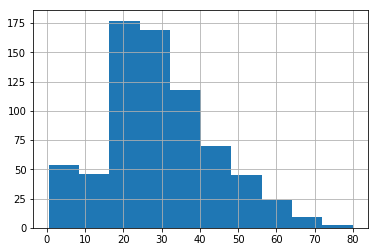

In [0]:
df['Age'].hist()

**How does the survival rate of the passengers differ between sexes?**

In [0]:
df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))

,Survived
Sex,
female,0.742038
male,0.188908


**Or how does it differ between the different classes?**

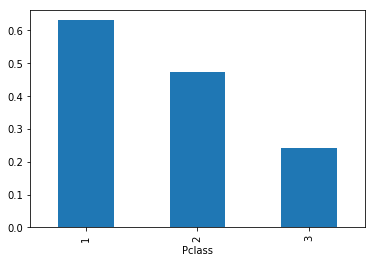

In [0]:
df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

In [0]:
from google.colab import files 
uploaded=files.upload()

All the needed functionality for the above examples will be explained throughout this tutorial.

#### Case 2: air quality measurement timeseries

AirBase (The European Air quality dataBase): hourly measurements of all air quality monitoring stations from Europe

Starting from these hourly data for different stations:

In [0]:
data = pd.read_csv('20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [0]:
data.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


to answering questions about this data in a few lines of code:

**Does the air pollution show a decreasing trend over the years?**

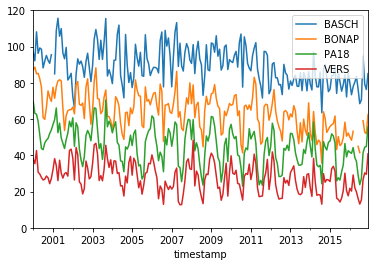

In [0]:
data['1999':].resample('M').mean().plot(ylim=[0,120])

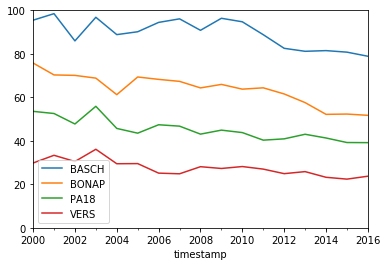

In [0]:
data['1999':].resample('A').mean().plot(ylim=[0,100])

**What is the difference in diurnal profile between weekdays and weekend?**

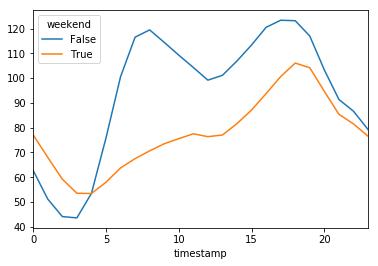

In [0]:
data['weekday'] = data.index.weekday
data['weekend'] = data['weekday'].isin([5, 6])
data_weekend = data.groupby(['weekend', data.index.hour])['BASCH'].mean().unstack(level=0)
data_weekend.plot()

We will come back to these example, and build them up step by step.

# 2. Pandas: data analysis in python

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

What is `pandas`?

* Pandas can be thought of as *NumPy arrays with labels* for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be thought of as `R`'s `data.frame` in Python.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

It's documentation: http://pandas.pydata.org/pandas-docs/stable/


** When do you need pandas? **

When working with **tabular or structured data** (like R dataframe, SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

Pandas is great for working with heterogeneous and tabular 1D/2D data, but not all types of data fit in such structures!
<ul>
<li>When working with array data (e.g. images, numerical algorithms): just stick with numpy</li>
<li>When working with multidimensional labeled data (e.g. climate data): have a look at [xarray](http://xarray.pydata.org/en/stable/)</li>
</ul>
</div>

# 2. The pandas data structures: `DataFrame` and `Series`

A `DataFrame` is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.


<img align="left" width=50% src="img/schema-dataframe.svg">

In [0]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [0]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [0]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

To check the data types of the different columns:

In [0]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
                ...   
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Length: 12, dtype: object

An overview of that information can be given with the `info()` method:

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [0]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

Apart from importing your data from an external source (text file, excel, database, ..), one of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [0]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


### One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labeled data**.

In [0]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [0]:
age = df['Age']

### Attributes of a Series: `index` and `values`

The Series has also an `index` and `values` attribute, but no `columns`

In [0]:
age.index

RangeIndex(start=0, stop=891, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [0]:
age.values[:10]

array([22., 38., 26., 35., 35., nan, 54.,  2., 27., 14.])

We can access series values via the index, just like for NumPy arrays:

In [0]:
age[0]

22.0

Unlike the NumPy array, though, this index can be something other than integers:

In [0]:
df = df.set_index('Name')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C
"Dooley, Mr. Patrick",891,0,3,male,32.0,0,0,370376,7.7500,NaN,Q


In [0]:
age = df['Age']
age

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
                                                       ... 
Graham, Miss. Margaret Edith                           19.0
Johnston, Miss. Catherine Helen "Carrie"                NaN
Behr, Mr. Karl Howell                                  26.0
Dooley, Mr. Patrick                                    32.0
Name: Age, Length: 891, dtype: float64

In [0]:
age['Dooley, Mr. Patrick']

32.0

but with the power of numpy arrays. Many things you can do with numpy arrays, can also be applied on DataFrames / Series.

Eg element-wise operations:

In [0]:
age * 1000

Name
Braund, Mr. Owen Harris                                22000.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38000.0
Heikkinen, Miss. Laina                                 26000.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35000.0
                                                        ...   
Graham, Miss. Margaret Edith                           19000.0
Johnston, Miss. Catherine Helen "Carrie"                   NaN
Behr, Mr. Karl Howell                                  26000.0
Dooley, Mr. Patrick                                    32000.0
Name: Age, Length: 891, dtype: float64

A range of methods:

In [0]:
age.mean()

29.69911764705882

Fancy indexing, like indexing with a list or boolean indexing:

In [0]:
age[age > 70]

Name
Goldschmidt, Mr. George B               71.0
Connors, Mr. Patrick                    70.5
Artagaveytia, Mr. Ramon                 71.0
Barkworth, Mr. Algernon Henry Wilson    80.0
Svensson, Mr. Johan                     74.0
Name: Age, dtype: float64

But also a lot of pandas specific methods, e.g.

In [0]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the maximum Fare that was paid? And the median?</li>
</ul>
</div>

In [0]:
# code here (for maximum)
df['Fare'].max()

512.3292

In [0]:
# code here (for median)
df['Fare'].median()


14.4542

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers (note: the 'Survived' column indicates whether someone survived (1) or not (0)).</li>
</ul>
</div>

In [0]:
# code here 
x = df.groupby('Survived')['PassengerId'].count()
x.index = ['Deceased','Survived']
print(x)
ratio = x.Survived/x.sum()
print('Survival ratio = {}'.format(ratio))

Deceased    549
Survived    342
Name: PassengerId, dtype: int64
Survival ratio = 0.3838383838383838


# 3. Data import and export

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* sas, stata
* (parquet)
* ...

Very powerful csv reader:

Luckily, if we have a well formed csv file, we don't need many of those arguments:

In [0]:
df = pd.read_csv("titanic.csv")

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">

<b>EXERCISE</b>: Read the `data/20000101_20161231-NO2.csv` file into a DataFrame `no2`
<br><br>
Some aspects about the file:
 <ul>
  <li>Which separator is used in the file?</li>
  <li>The second row includes unit information and should be skipped (check `skiprows` keyword)</li>
  <li>For missing values, it uses the `'n/d'` notation (check `na_values` keyword)</li>
  <li>We want to parse the 'timestamp' column as datetimes (check the `parse_dates` keyword)</li>
</ul>
</div>

In [0]:
# code here 
no2 = pd.read_csv('20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [0]:
no2

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
...,...,...,...,...
2016-12-31 20:00:00,73.0,51.0,49.0,20.0
2016-12-31 21:00:00,61.0,51.0,48.0,16.0
2016-12-31 22:00:00,57.0,49.0,45.0,14.0
2016-12-31 23:00:00,51.0,47.0,45.0,12.0


# 4. Exploration

Some useful methods:

`head` and `tail`

In [0]:
no2.head(3)

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0


In [0]:
no2.tail()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2016-12-31 19:00:00,77.0,49.0,52.0,23.0
2016-12-31 20:00:00,73.0,51.0,49.0,20.0
2016-12-31 21:00:00,61.0,51.0,48.0,16.0
2016-12-31 22:00:00,57.0,49.0,45.0,14.0
2016-12-31 23:00:00,51.0,47.0,45.0,12.0


`info()`

In [0]:
no2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149039 entries, 2000-01-01 01:00:00 to 2016-12-31 23:00:00
Data columns (total 4 columns):
BASCH    139949 non-null float64
BONAP    136493 non-null float64
PA18     142259 non-null float64
VERS     143813 non-null float64
dtypes: float64(4)
memory usage: 5.7 MB


Getting some basic summary statistics about the data with `describe`:

In [0]:
no2.describe()

,BASCH,BONAP,PA18,VERS
count,139949.000000,136493.000000,142259.000000,143813.000000
mean,89.270098,64.001714,45.104211,27.613227
std,36.772855,27.866767,23.212719,19.604953
min,4.000000,0.000000,2.000000,0.000000
25%,63.000000,44.000000,28.000000,13.000000
50%,87.000000,62.000000,42.000000,22.000000
75%,112.000000,81.000000,59.000000,38.000000
max,358.000000,345.000000,306.000000,197.000000


Quickly visualizing the data

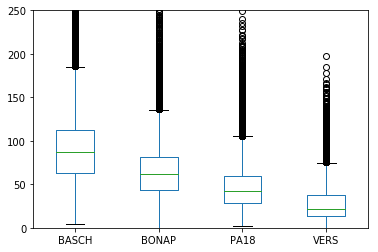

In [0]:
no2.plot(kind='box', ylim=[0,250])

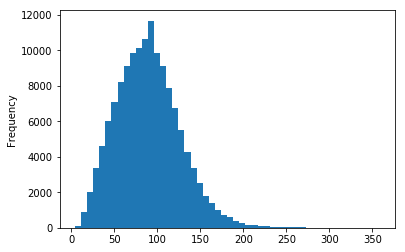

In [0]:
no2['BASCH'].plot(kind='hist', bins=50)

<div class="alert alert-success">

<b>EXERCISE</b>: 

 <ul>
  <li>Plot the age distribution of the titanic passengers</li>
</ul>
</div>

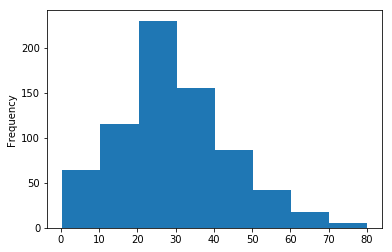

In [0]:
# code here
df['Age'].plot(kind='hist', bins = 8)

The default plot (when not specifying `kind`) is a line plot of all columns:

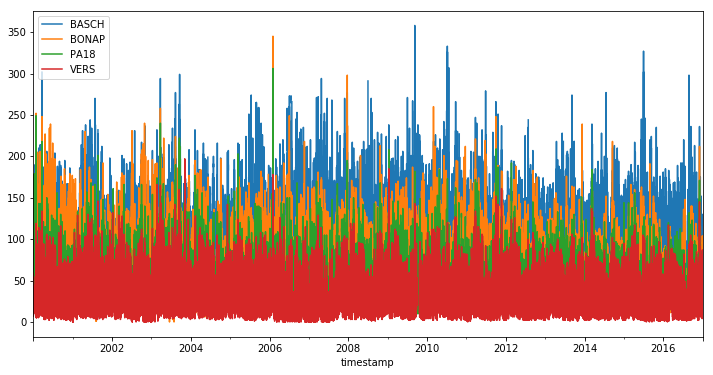

In [0]:
no2.plot(figsize=(12,6))

This does not say too much ..

We can select part of the data (eg the latest 500 data points):

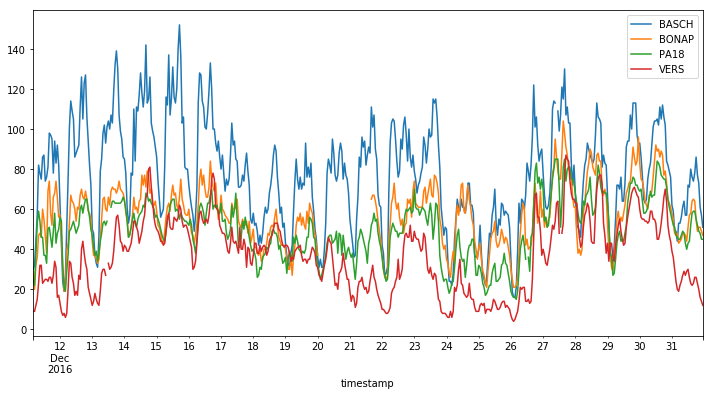

In [0]:
no2[-500:].plot(figsize=(12,6))

In [0]:
from google.colab import files 
uploaded=files.upload()

Saving 20000101_20161231-NO2.csv to 20000101_20161231-NO2.csv


Or we can use some more advanced time series features -> see further in this notebook!

# 5. Selecting and filtering data

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. <br><br> We now have to distuinguish between:

 <ul>
  <li>selection by **label**</li>
  <li>selection by **position**</li>
</ul>
</div>

In [0]:
df = pd.read_csv("titanic.csv")

### `df[]` provides some convenience shortcuts 

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [0]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

or multiple columns:

In [0]:
df[['Age', 'Fare']]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
...,...,...
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000
890,32.0,7.7500


But, slicing accesses the rows:

In [0]:
df[10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


### Systematic indexing with `loc` and `iloc`

When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [0]:
df = df.set_index('Name')

In [0]:
df.loc['Bonnell, Miss. Elizabeth', 'Fare']

26.55

In [0]:
df.loc['Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan', :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Bonnell, Miss. Elizabeth",12,1,1,female,58.0,0,0,113783,26.550,C103,S
"Saundercock, Mr. William Henry",13,0,3,male,20.0,0,0,A/5. 2151,8.050,NaN,S
"Andersson, Mr. Anders Johan",14,0,3,male,39.0,1,5,347082,31.275,NaN,S


Selecting by position with `iloc` works similar as indexing numpy arrays:

In [0]:
df.iloc[0:2,1:3]

,Survived,Pclass
Name,,
"Braund, Mr. Owen Harris",0,3
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1


The different indexing methods can also be used to assign data:

In [0]:
df.loc['Braund, Mr. Owen Harris', 'Survived'] = 100

In [0]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,100,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C
"Dooley, Mr. Patrick",891,0,3,male,32.0,0,0,370376,7.7500,NaN,Q


### Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' (like a where clause in SQL) and comparable to numpy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [0]:
df['Fare'] > 50

Name
Braund, Mr. Owen Harris                                False
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     True
Heikkinen, Miss. Laina                                 False
Futrelle, Mrs. Jacques Heath (Lily May Peel)            True
                                                       ...  
Graham, Miss. Margaret Edith                           False
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                  False
Dooley, Mr. Patrick                                    False
Name: Fare, Length: 891, dtype: bool

In [0]:
df[df['Fare'] > 50]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Fortune, Mr. Charles Alexander",28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...
"Sage, Miss. Dorothy Edith ""Dolly""",864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S
"Roebling, Mr. Washington Augustus II",868,0,1,male,31.0,0,0,PC 17590,50.4958,A24,S
"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",872,1,1,female,47.0,1,1,11751,52.5542,D35,S
"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",880,1,1,female,56.0,0,1,11767,83.1583,C50,C


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, select all rows for male passengers and calculate the mean age of those passengers. Do the same for the female passengers</li>
</ul>
</div>

In [0]:
df = pd.read_csv("titanic.csv")

In [0]:
# Code here
df[df['Sex'] == 'male']['Age'].mean()

30.72664459161148

In [0]:
# Code here
df[df['Sex'] == 'female']['Age'].mean()

27.915708812260537

In [0]:
# Code here
df['Age'].mean()

29.69911764705882

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, how many passengers older than 70 were on the Titanic?</li>
</ul>
</div>

In [0]:
# Code here 
x=df[df['Age'] > 70]['PassengerId'].count()

In [0]:
# Code here
print('passengers older than 70=',x)

passengers older than 70= 5


# 6. The group-by operation

### Some 'theory': the groupby operation (split-apply-combine)

In [0]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
...,...,...
5,C,15
6,A,10
7,B,15
8,C,20


### Recap: aggregating functions

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [0]:
df['data'].sum()

90

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups, we could do the following:

In [0]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

### Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

In [0]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [0]:
df.groupby('key').aggregate(np.sum)  # 'sum'

,data
key,
A,15
B,30
C,45


And many more methods are available. 

In [0]:
df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

### Application of the groupby concept on the titanic data

We go back to the titanic passengers survival data:

In [0]:
df = pd.read_csv("titanic.csv")

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average age for each sex again, but now using groupby.</li>
</ul>
</div>

In [0]:
# Code here
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers.</li>
</ul>
</div>

In [0]:
# Code here
x = df.groupby('Survived')['PassengerId'].count()
ratio = x[1]/x.sum()
print('The average survival ratio = ',ratio)

The average survival ratio =  0.3838383838383838


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate this survival ratio for all passengers younger that 25 (remember: filtering/boolean indexing).</li>
</ul>
</div>

In [0]:
# Code here
df[df['Age']<25]['Survived'].mean()

0.4244604316546763

In [0]:
from google.colab import files
uploaded=files.upload()

Saving titanic.csv to titanic.csv


In [0]:
import io
df=pd.read_csv('titanic.csv')

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the difference in the survival ratio between the sexes?</li>
</ul>
</div>

In [0]:
# Code here


ratio=df.groupby('Sex')['Survived'].mean()
diff = abs(ratio[0]-ratio[1])
diff

0.5531300709799203

In [0]:
from google.colab import files 
uploaded=files.upload()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Or how does it differ between the different classes? Make a bar plot visualizing the survival ratio for the 3 classes.</li>
</ul>
</div>

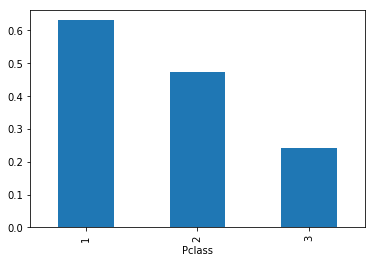

In [39]:
# Code here 
survival_ratio = df.groupby('Pclass')['Survived'].mean()
survival_ratio.plot(kind='bar')

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a bar plot to visualize the average Fare payed by people depending on their age. The age column is devided is separate classes using the `pd.cut` function as provided below.</li>
</ul>
</div>

In [0]:
df['AgeClass'] = pd.cut(df['Age'], bins=np.arange(0,90,10))

<BarContainer object of 8 artists>

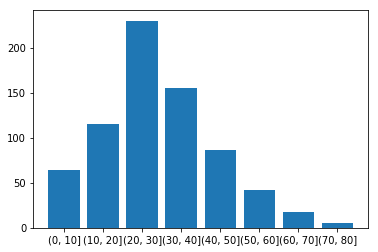

In [42]:
# Code here 
x_class = ['(0, 10]','(10, 20]','(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]', '(60, 70]', '(70, 80]']
fare.range = df.groupby('AgeClass')['PassengerId'].count()
plt.bar(x_class,fare.range)


## Further reading

* Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/


*  Blog

  * https://tomaugspurger.github.io/modern-1.html



```
# This is formatted as code
```




## Make a simple logistic Regression Model
* The model would be predicting whether a person with a certain attributes would survive or not
* Train with 70 percent of the data and take the y column as Survived or not
* You **CAN NOT** use any library to make the logistic regression model, you can use only numpy and pandas. The model has to be built from the scratch


In [0]:
##Code here, Refer to google for any doubts firsthand there is precedence for this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv("titanic.csv") 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Make a linear Regression model
* The model would be predicting The age of a given passenger using all the other known attributes of the person
* Train with 70 percent of the data and take the y column as Age
* You **CAN NOT** use any library to make the logistic regression model, you can use only numpy and pandas. The model has to be built from the scratch


In [0]:
##Code here, Refer to google for any doubts firsthand there is precedence for this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv("titanic.csv") 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Submission rules
* Report the AUC score of the logistic regression model and the MAPE score of the Linear Regression model on the test data
* AUC score as .4 and MAPE as 5 percent then **name_4_95.ipynb** should be the name of your submission file 
* All submissions Are to be made as pull requests on the Business Club IIT Kharagpur's github account on the Summer assignment 1 repository (https://github.com/business-club-iit-kharagpur)